<a href="https://www.kaggle.com/code/muradpitafi/gender-classification?scriptVersionId=201233621" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
# #         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Found 160000 images belonging to 2 classes.
Found 22598 images belonging to 2 classes.
Found 20001 images belonging to 2 classes.


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1728973397.486189      88 service.cc:145] XLA service 0x7a6314003c20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728973397.486245      88 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1728973397.486249      88 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


   3/5000 ━━━━━━━━━━━━━━━━━━━━ 5:01 60ms/step - accuracy: 0.6354 - loss: 0.9779  

I0000 00:00:1728973402.427817      88 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


5000/5000 ━━━━━━━━━━━━━━━━━━━━ 674s 133ms/step - accuracy: 0.8960 - loss: 0.2320 - val_accuracy: 0.9648 - val_loss: 0.1003
Epoch 2/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 389s 78ms/step - accuracy: 0.9633 - loss: 0.0980 - val_accuracy: 0.9700 - val_loss: 0.0818
Epoch 3/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 290s 58ms/step - accuracy: 0.9685 - loss: 0.0867 - val_accuracy: 0.9691 - val_loss: 0.0783
Epoch 4/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 263s 52ms/step - accuracy: 0.9725 - loss: 0.0748 - val_accuracy: 0.9709 - val_loss: 0.0757
Epoch 5/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 273s 54ms/step - accuracy: 0.9743 - loss: 0.0706 - val_accuracy: 0.9745 - val_loss: 0.0662
Epoch 6/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 313s 63ms/step - accuracy: 0.9764 - loss: 0.0664 - val_accuracy: 0.9748 - val_loss: 0.0665
Epoch 7/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 324s 65ms/step - accuracy: 0.9773 - loss: 0.0622 - val_accuracy: 0.9757 - val_loss: 0.0648
Epoch 8/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 318s 64ms/step - accuracy: 0.9786 - l

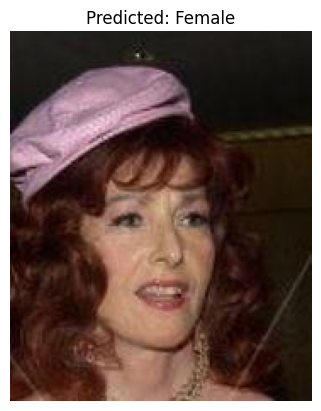

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


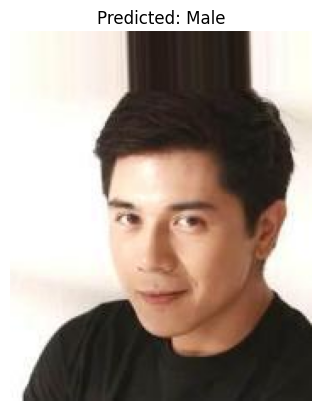

In [2]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

train_dir = '/kaggle/input/gender-recognition-200k-images-celeba/Dataset/Train'
test_dir = '/kaggle/input/gender-recognition-200k-images-celeba/Dataset/Test'
val_dir = '/kaggle/input/gender-recognition-200k-images-celeba/Dataset/Validation'

img_size = 128
batch_size = 32
subset_size = 0.1  # Use only 10% of the dataset for faster training

train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

def subset_flow_from_directory(generator, dir, subset_size):
    total_images = sum([len(files) for r, d, files in os.walk(dir)])
    target_size = int(total_images * subset_size)
    
    return generator.flow_from_directory(
        dir, target_size=(img_size, img_size), 
        batch_size=batch_size, class_mode='binary', 
        shuffle=True, subset=None), target_size

train_generator, train_size = subset_flow_from_directory(train_datagen, train_dir, subset_size)
val_generator, val_size = subset_flow_from_directory(val_datagen, val_dir, subset_size)
test_generator, test_size = subset_flow_from_directory(test_datagen, test_dir, subset_size)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, validation_data=val_generator, epochs=10)

test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")

model.save('gender_classification_cnn.h5')

# Load some test images and show their predictions
def plot_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (img_size, img_size))
    img_array = np.array(img_resized) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    prediction = model.predict(img_array)[0][0]
    gender = 'Female' if prediction < 0.5 else 'Male'
    
    plt.imshow(img)
    plt.title(f"Predicted: {gender}")
    plt.axis('off')
    plt.show()

# Example test images to predict and show results
test_image_paths = [
    os.path.join(test_dir, 'Female', '160001.jpg'),
    os.path.join(test_dir, 'Male', '160002.jpg')
]

for img_path in test_image_paths:
    plot_image(img_path)
